<h1 style='background:#0A4D68; border:3; color:cyan; border-color:cyan; border-style:dotted;'><center> TELCO CHURN PREDICTION</center></h1> 

# Customer Churn Analysis and Prediction using Classification

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Data Understanding

The data for this project is in a csv format. The following describes the columns present in the data.

**Gender --** Whether the customer is a male or a female

**SeniorCitizen --** Whether a customer is a senior citizen or not

**Partner --** Whether the customer has a partner or not (Yes, No)

**Dependents --** Whether the customer has dependents or not (Yes, No)

**Tenure --** Number of months the customer has stayed with the company

**Phone Service --** Whether the customer has a phone service or not (Yes, No)

**MultipleLines --** Whether the customer has multiple lines or not

**InternetService --** Customer's internet service provider (DSL, Fiber Optic, No)

**OnlineSecurity --** Whether the customer has online security or not (Yes, No, No Internet)

**OnlineBackup --** Whether the customer has online backup or not (Yes, No, No Internet)

**DeviceProtection --** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport --** Whether the customer has tech support or not (Yes, No, No internet)

**StreamingTV --** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies --** Whether the customer has streaming movies or not (Yes, No, No Internet service)

**Contract --** The contract term of the customer (Month-to-Month, One year, Two year)

**PaperlessBilling --** Whether the customer has paperless billing or not (Yes, No)

**Payment Method --** The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

**MonthlyCharges --** The amount charged to the customer monthly

**TotalCharges --** The total amount charged to the customer

**Churn --** Whether the customer churned or not (Yes or No)

## Research Questions
1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

4. What is the average monthly charges and total charges for customers who churned and those who didn't?

5. What is the churn rate based on the tenure of customers with the company?

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

7. How does the distribution of total charges incurred by customers relate to churn rates?

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

<h3 style='background:#0A4D68; border:3; color:cyan; border-color:cyan; border-style:dotted;'><center> SETUP AND INSTALLATIONS</center></h3> 

In [1]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install plotly
%pip install scipy
%pip install scikit-learn
%pip install xgboost
%pip install python-dotenv 
%pip install openpyxl
%pip install pandas-profiling
%pip install ydata-profiling
%pip install ipywidgets



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use u

<h3 style='background:#0A4D68; border:3; color:cyan; border-color:cyan; border-style:dotted;'><center> IMPORTING NECESSARY MODULES AND LIBRARIES</center></h3> 

In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package

import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import plotly.express as px
color = sns.color_palette()
import matplotlib.colors as mcolors
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.io import write_html

from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

import jupyter
import ipywidgets

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

### Load the remote dataset (first dataset)

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = "DRIVER={ODBC Driver 17 for SQL Server};SERVER={dap-projects-database.database.windows.net};DATABASE={dapDB};UID={dataAnalyst_LP2};PWD={A3g@3kR$2y}"


In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [5]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

### Load Test dataset.

In [6]:
excel_file = "Telco-churn-second-2000.xlsx"

df_test = pd.read_excel(excel_file, engine='openpyxl')

# Save the DataFrame as a CSV file
df_test.to_csv('df_test.csv', index=False)

### Load Third Dataset

In [7]:
data3 = pd.read_csv("LP2_Telco-churn-last-2000.csv")

### Cleaning First Dataset

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True


In [9]:
data.shape # looking at the shape of the data 

(3000, 21)

In [10]:
data.columns # looking at the columns in the data set 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data.info() # getting general information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [12]:
data.describe() # looking at the statistical describtion of the data set

,tenure,MonthlyCharges,TotalCharges
count,3000.00,3000.00,2995.00
mean,32.53,65.35,2301.28
std,24.64,30.14,2274.99
min,0.00,18.40,18.80
25%,9.00,35.79,415.25
50%,29.00,70.90,1404.65
75%,56.00,90.26,3868.73
max,72.00,118.65,8564.75


In [13]:
data.duplicated().sum() # checking for duplicate columns 

0

In [14]:
# Next drop duplicated columns 
data.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [15]:
data.isnull().sum() # checking for null values 

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [16]:
# Calculate the % of missing values in the dataset
missing_values_percent = data.isna().mean().round(4) * 100
print(missing_values_percent)

customerID          0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       8.99
InternetService     0.00
OnlineSecurity     21.58
OnlineBackup       21.58
DeviceProtection   21.58
TechSupport        21.58
StreamingTV        21.58
StreamingMovies    21.58
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.17
Churn               0.03
dtype: float64


In our analysis, we are using a threshold of 30% for missing values. Columns with missing values above this threshold will be considered for removal.

In this case, no column has more than 30% missing data, so all columns are retained. For those columns with missing data below this threshold, we will perform imputation to fill in the missing values.

In [17]:
# Fill Null with mode in categorical dataset
columns_to_fill = ['MultipleLines',  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

for column in columns_to_fill:
    data[column].fillna(data[column].mode()[0], inplace=True)

To ensure that our data is correctly processed by our model, we need to make sure that each feature is of the correct data type. 


In [18]:
#change the dtype for SeniorCitizen column to be same as other datasets
data['SeniorCitizen'] = data['SeniorCitizen'].astype(int)

In [19]:
# change dtype from bool to object in categorical columns
cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# Convert bool to str in df2
for col in cols:
    data[col] = data[col].astype(str)

# Consistent representation
for col in cols:
    data[col] = data[col].map({'True': 'Yes', 'False': 'No'})

In [20]:
data.head() # looking at the head of the  data set againg 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check for outliers in the TotalCharges  column

In [21]:
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['TotalCharges'] < lower_bound) | (data['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')


There are 0 outliers in TotalCharges.


There are no outliers. The mean can be used to impute missing values in the TotalCharges Column

In [22]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data.TotalCharges = imputer.fit_transform(data["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [23]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [24]:
data['tenure_group'].value_counts() # checking the counts of each unique values  

1 - 12     919
61 - 72    614
13 - 24    430
25 - 36    364
49 - 60    340
37 - 48    321
Name: tenure_group, dtype: int64

In [25]:
#drop column customerID
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [26]:
data.isnull().sum() # confriming for null values in the data set

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        5
dtype: int64

In [27]:
data = data.dropna(subset=['tenure_group']) # dropping na values 

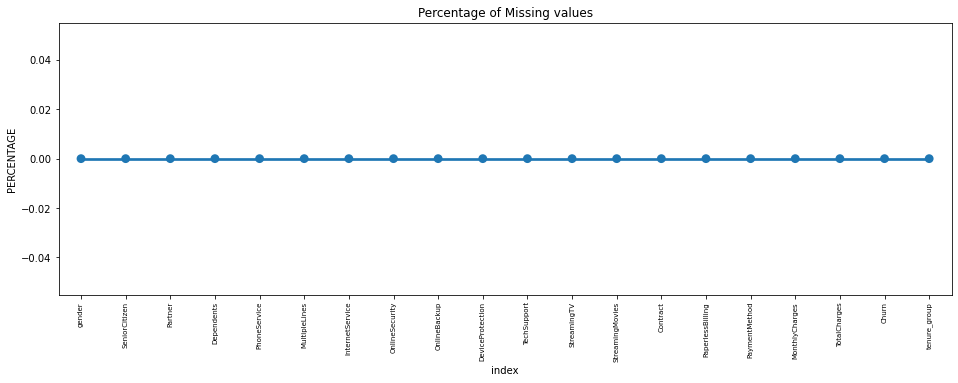

In [28]:
# below we are plotting percentage of null values per column 

missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Cleaning Test Dataset

In [29]:
df_test.head() # checking the head of the data set

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [30]:
df_test.shape # looking at the shape of the data set

(2000, 20)

In [31]:
df_test.columns # checking the columns of the data set 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [32]:
df_test.info() # checking for the information in the data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [33]:
df_test.describe()  # checking for statistical information

,SeniorCitizen,tenure,MonthlyCharges
count,2000.00,2000.00,2000.00
mean,0.16,31.85,63.93
std,0.37,24.63,30.14
min,0.00,0.00,18.25
25%,0.00,8.00,34.25
50%,0.00,27.00,69.80
75%,0.00,55.00,89.28
max,1.00,72.00,118.75


In [34]:
df_test.duplicated().sum() # checking for duplicated values 

0

In [35]:
# dropping the duplicated rows 
df_test.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], inplace=True)

In [36]:
df_test.isnull().sum() # checking for null values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [37]:
# converting the totalcharges to numeric data type 
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'],errors = 'coerce')

In [38]:
df_test.isnull().sum() # checking for null values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

### Check for outliers in the TotalCharges  column

In [39]:
Q1 = df_test['TotalCharges'].quantile(0.25)
Q3 = df_test['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_test[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 2 outliers in TotalCharges.


There are only 2 outliers. Outliers are handled by replacing them with the median of the non-outlier values. This helps to prevent the skewing of the data that can be caused by extreme outlier values.The mean can be used to impute missing values in the TotalCharges Column

In [40]:
# Calculate the median of the column without the outliers
median = df_test.loc[(df_test['TotalCharges'] >= lower_bound) & (df_test['TotalCharges'] <= upper_bound), 'TotalCharges'].median()

# Replace the outliers with the median
df_test.loc[(df_test['TotalCharges'] < lower_bound) | (df_test['TotalCharges'] > upper_bound), 'TotalCharges'] = median

In [41]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df_test.TotalCharges = imputer.fit_transform(df_test["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [42]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_test['tenure_group'] = pd.cut(df_test.tenure, range(1, 80, 12), right=False, labels=labels)

In [43]:
df_test['tenure_group'].value_counts()  # cheking for the counts of the unique values 

1 - 12     638
61 - 72    390
13 - 24    292
49 - 60    242
25 - 36    229
37 - 48    203
Name: tenure_group, dtype: int64

Remove column not needed

In [44]:
#drop column customerID 
df_test.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [45]:
df_test.isnull().sum() # checking for null values 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_group        3
dtype: int64

In [46]:
df_test = df_test.dropna(subset=['tenure_group']) # dropping na values 

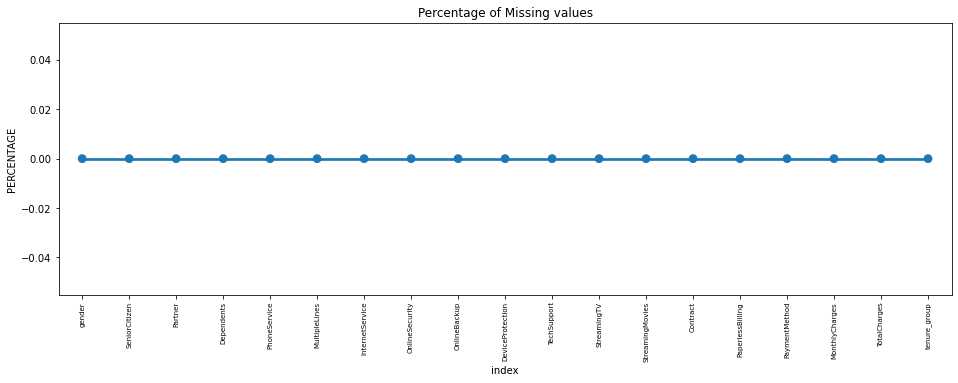

In [47]:
# plotting the percentage of missing values per column 

missing = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Cleaning Third Dataset

In [48]:
df_test.head() # checking the head of the data set 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1 - 12
1,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,1 - 12
2,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,25 - 36
3,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,25 - 36
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1 - 12


In [49]:
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [50]:
data3.shape

(2043, 21)

In [51]:
data3.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [53]:
data3.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.00,2043.00,2043.00
mean,0.17,32.65,64.71
std,0.37,24.38,29.97
min,0.00,0.00,18.55
25%,0.00,9.00,35.83
50%,0.00,30.00,70.25
75%,0.00,55.00,89.62
max,1.00,72.00,118.35


In [54]:
data3.duplicated().sum()

0

In [55]:
data3.drop_duplicates(subset=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], inplace=True)

In [56]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Convert TotalCharges to numeric datatype

In [57]:
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'],errors = 'coerce')

In [58]:
data3.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

### Check for outliers in the TotalCharges  column

In [59]:
Q1 = data3['TotalCharges'].quantile(0.25)
Q3 = data3['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data3[(data3['TotalCharges'] < lower_bound) | (data3['TotalCharges'] > upper_bound)]

print(f'There are {outliers.shape[0]} outliers in TotalCharges.')

There are 0 outliers in TotalCharges.


In [60]:
# The imputer will replace missing values with the mean of the non-missing values for the respective column

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

data3.TotalCharges = imputer.fit_transform(data3["TotalCharges"].values.reshape(-1, 1))

To better understand customer churn patterns, we categorize customers into tenure groups. For example, customers with less than a year's tenure are grouped as '1-12', and those with one to two years' tenure as '13-24'. This categorization aids in revealing trends and insights related to customer churn across different tenure periods.

In [61]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data3['tenure_group'] = pd.cut(data3.tenure, range(1, 80, 12), right=False, labels=labels)

In [62]:
data3['tenure_group'].value_counts()

1 - 12     605
61 - 72    403
13 - 24    302
49 - 60    250
25 - 36    239
37 - 48    238
Name: tenure_group, dtype: int64

In [63]:
#drop column customerID
data3.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [64]:
data3.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
tenure_group        category
dtype: object

In [65]:
data3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        3
dtype: int64

In [66]:
data3 = data3.dropna(subset=['tenure_group'])

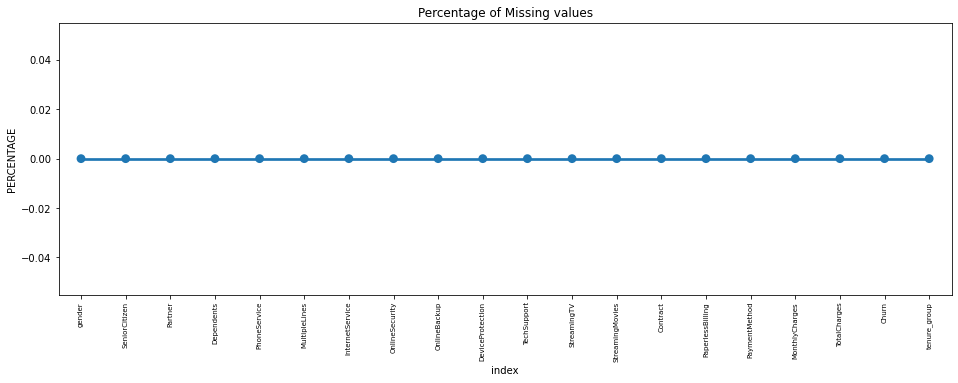

In [67]:
missing = pd.DataFrame((data3.isnull().sum())*100/data3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [68]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.70,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.50,Yes,13 - 24
2,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10,No,61 - 72
3,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.20,Yes,1 - 12
4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.40,No,61 - 72


### After Cleaning Concatenate First Dataset and Third Dataset. Do not include the Test Dataset

In [69]:
# Concatenate the data frames
df = pd.concat([data, data3])

In [70]:
# Reseting the index of the concatenated data frame
df.to_csv('df.csv', index=False)

In [71]:
df= pd.read_csv('df.csv')

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [73]:
df.shape

(5025, 20)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5025 non-null   object 
 1   SeniorCitizen     5025 non-null   int64  
 2   Partner           5025 non-null   object 
 3   Dependents        5025 non-null   object 
 4   PhoneService      5025 non-null   object 
 5   MultipleLines     5025 non-null   object 
 6   InternetService   5025 non-null   object 
 7   OnlineSecurity    5025 non-null   object 
 8   OnlineBackup      5025 non-null   object 
 9   DeviceProtection  5025 non-null   object 
 10  TechSupport       5025 non-null   object 
 11  StreamingTV       5025 non-null   object 
 12  StreamingMovies   5025 non-null   object 
 13  Contract          5025 non-null   object 
 14  PaperlessBilling  5025 non-null   object 
 15  PaymentMethod     5025 non-null   object 
 16  MonthlyCharges    5025 non-null   float64


In [75]:
df.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,5025.00,5025.00,5025.00
mean,0.16,65.17,2306.57
std,0.37,30.06,2269.49
min,0.00,18.40,18.80
25%,0.00,35.90,419.70
50%,0.00,70.65,1406.65
75%,0.00,90.05,3865.60
max,1.00,118.65,8670.10


### Profile Report for Trainset

In [76]:

profile = ProfileReport(df, title='Train Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Trainset] Pandas-Profiling_Report.html")


NameError: name 'ProfileReport' is not defined

### Profile Report for Test set

In [ ]:

profile = ProfileReport(df_test, title='Test Dataset', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file("[Testset] Pandas-Profiling_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Exploration

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?
2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?
3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?
4. What is the average monthly charges and total charges for customers who churned and those who didn't?
5. What is the churn rate based on the tenure of customers with the company?
6. What is the distribution of monthly charges for customers who churned versus those who did not churn?
7. How does the distribution of total charges incurred by customers relate to churn rates?
8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?
9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

### Univariate Analysis
Univariate Analysis - analysis of a single variable

1. What is the churn rate among customers? How many customers have churned (Yes) versus those who haven't (No)?

In [ ]:
# Calculate the number of customers who churned and didn't churn
churn_counts= df['Churn'].value_counts()
churn_counts

Churn
No     3694
Yes    1331
Name: count, dtype: int64

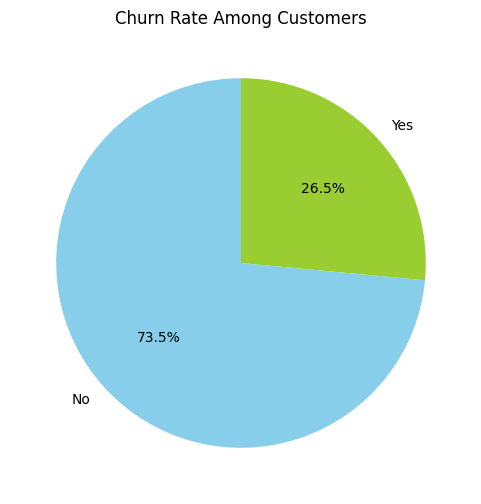

In [ ]:
# Pie Chart to visualize churn rate
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels = churn_counts.index, startangle=90, autopct='%1.1f%%', colors=['skyblue', 'yellowgreen'])
plt.title('Churn Rate Among Customers')
plt.show()

The dataset is highly imbalanced. The ratio of the two classes is 73:27. When dealing with imbalanced datasets, it's important to apply appropriate techniques during the model training phase, such as resampling, use of appropriate evaluation metrics, or implementation of anomaly detection techniques. 

To gain insights from our data, we should perform separate analyses for each of our target classes. This means considering our target values separately and observing how other features behave in each case. 

Let's delve into exploratory data analysis, investigating relationships between the target variable and other features, as well as relationships amongst the independent variables themselves. This will provide a clearer view on how the features contribute to the target variable, and might shed some light on why such imbalance is present in our target variable.

2. How does the distribution of churn ('Yes' and 'No') vary across different categories of the predictor variable?

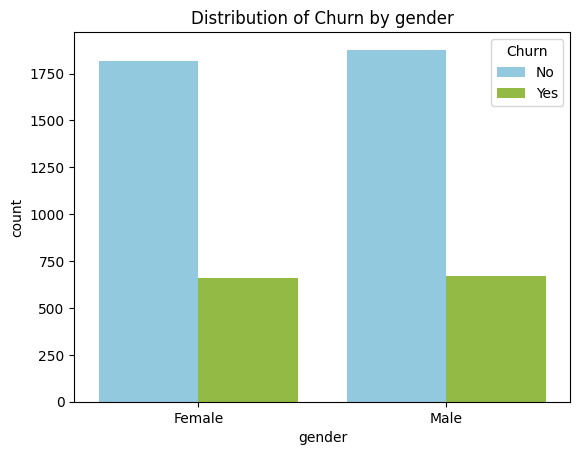

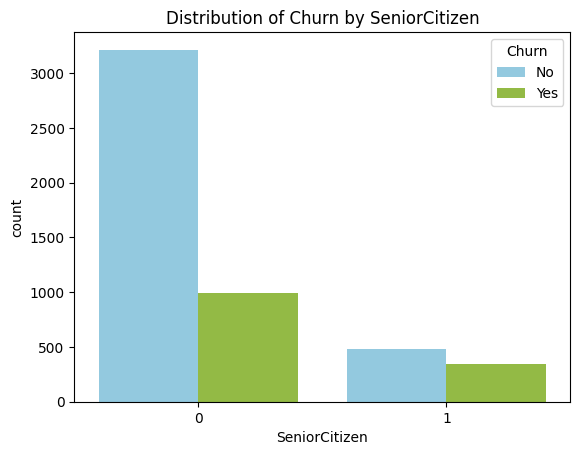

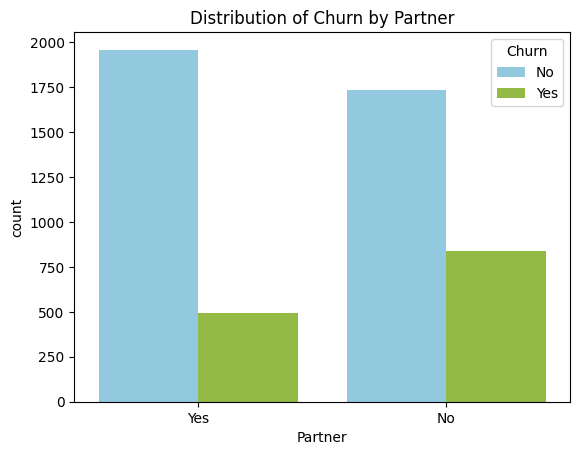

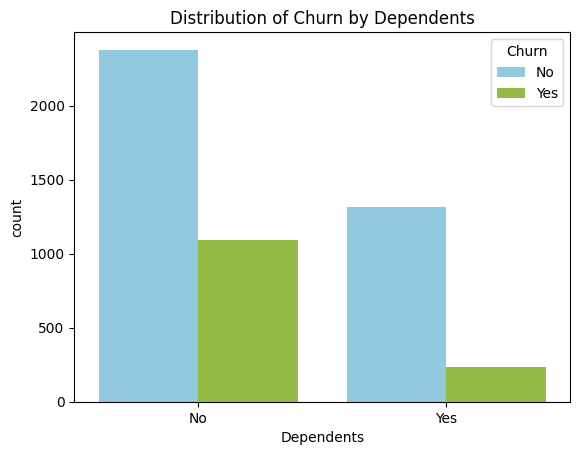

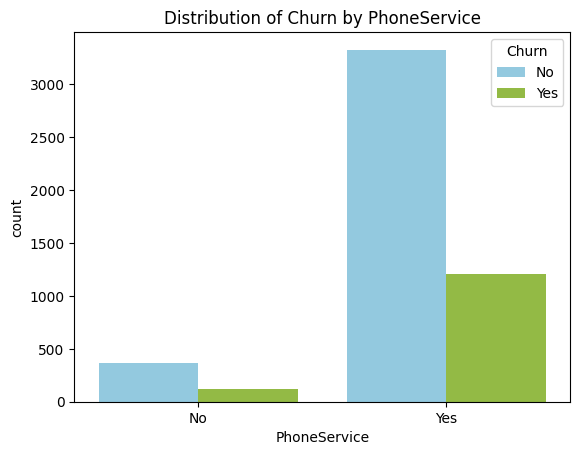

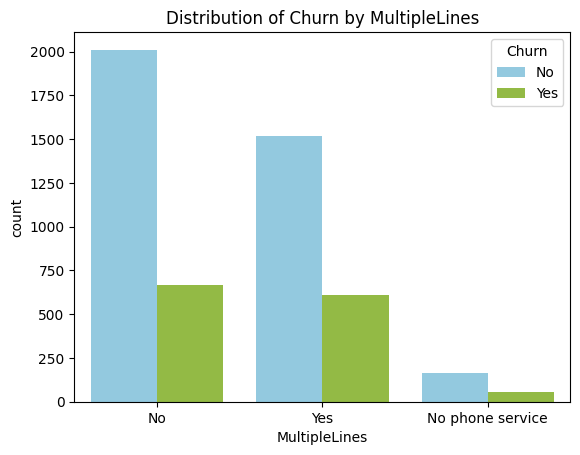

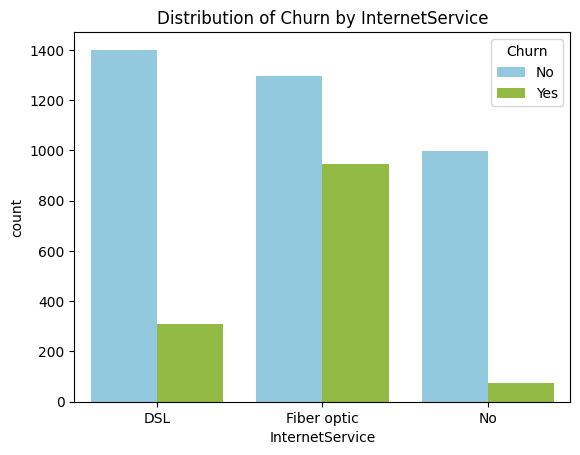

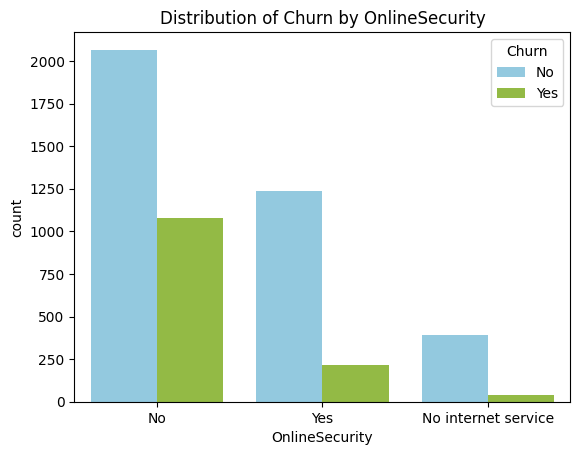

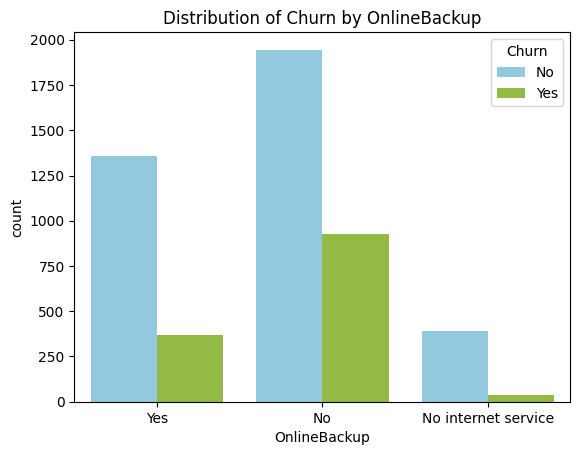

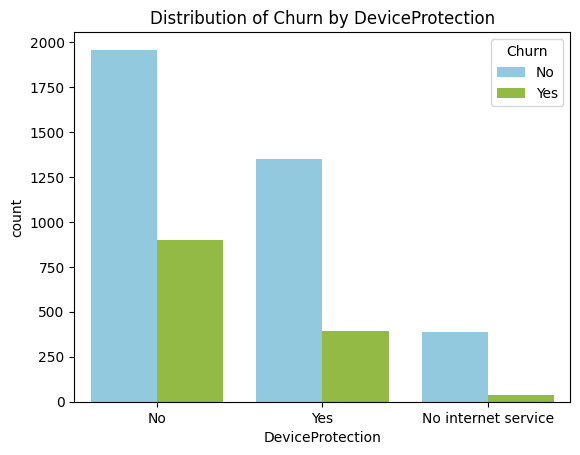

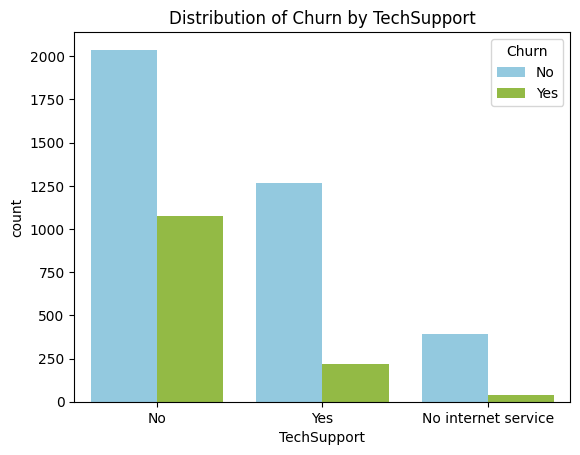

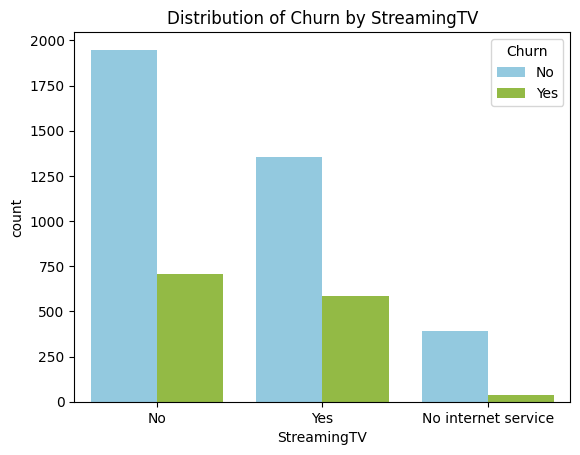

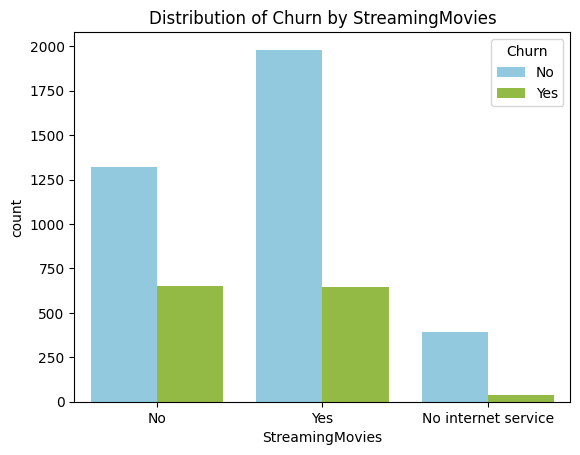

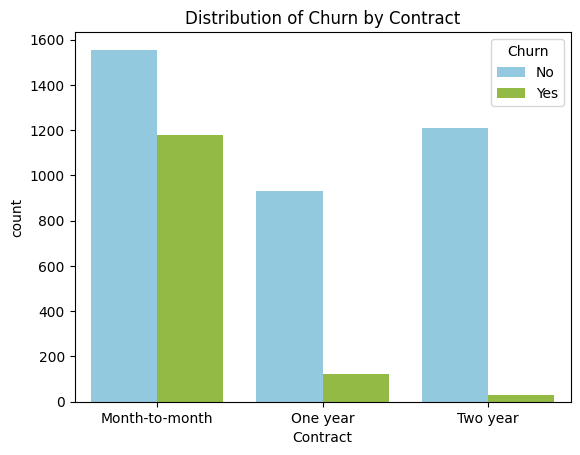

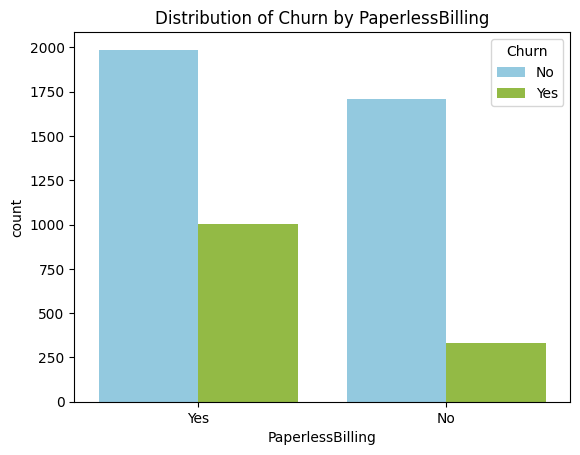

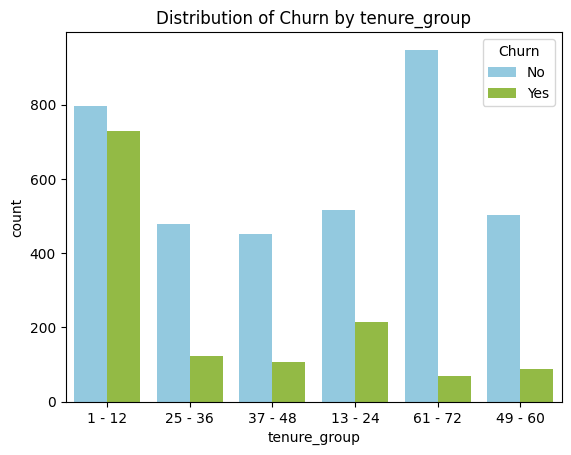

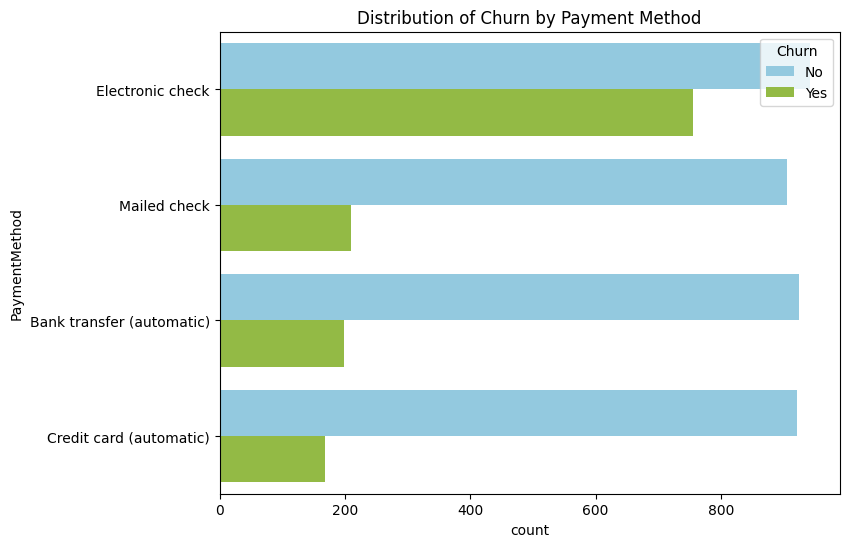

In [ ]:
for i, predictor in enumerate(df.drop(columns=['Churn','PaymentMethod', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn', palette=['skyblue', 'yellowgreen'])
    plt.title(f'Distribution of Churn by {predictor}')
    plt.show()

# Separate plot for 'PaymentMethod'
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='PaymentMethod', hue='Churn', palette=['skyblue', 'yellowgreen'])
plt.title('Distribution of Churn by Payment Method')
plt.show()

3. What are the distributions and summaries of monthly charges, and total charges for the customer base, and are there any notable outliers in these distributions?

In [ ]:
# Create subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# box plot for 'MonthlyCharges'
fig.add_trace(
    go.Box(y=df['MonthlyCharges'], name='MonthlyCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=1)

# box plot for 'TotalCharges'
fig.add_trace(
    go.Box(y=df['TotalCharges'], name='TotalCharges', marker_color='midnightblue', line_color='rgb(8, 48, 107)', line_width=1.5),
    row=1, col=2)

# Update layout
fig.update_layout(height=400, width=1200, title_text="Descriptive Statistics of Monthly Charges and Total Charges")
fig.show()

# Save figure to HTML file
write_html(fig, 'Descriptive_Statistics_Boxplots.html')

### **Bivariate Analysis** (analysis involving two variables)

4. What is the average monthly charges and total charges for customers who churned and those who didn't according ?

In [ ]:
# Calculate the average MonthlyCharges and TotalCharges for customers who churned and those who didn't
avg_charges = df.groupby(['Churn'])[['MonthlyCharges', 'TotalCharges']].mean()

print(avg_charges)

       MonthlyCharges  TotalCharges
Churn                              
No              61.53       2571.17
Yes             75.29       1572.20


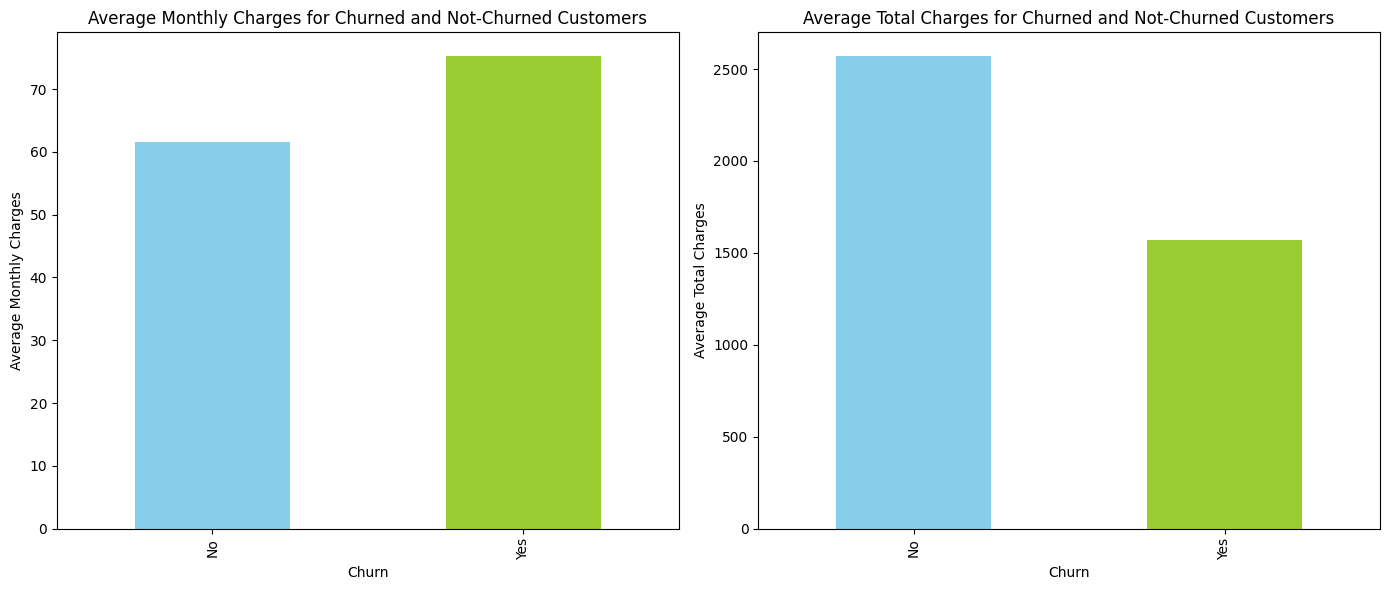

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the average MonthlyCharges
avg_charges['MonthlyCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[0])
axes[0].set_ylabel('Average Monthly Charges')
axes[0].set_title('Average Monthly Charges for Churned and Not-Churned Customers')

# Plot the average TotalCharges
avg_charges['TotalCharges'].plot(kind='bar', color=['skyblue', 'yellowgreen'], ax=axes[1])
axes[1].set_ylabel('Average Total Charges')
axes[1].set_title('Average Total Charges for Churned and Not-Churned Customers')

plt.tight_layout()
plt.show()

This suggests that customers who churn tend to be those with higher monthly charges but lower total charges, possibly indicating that these customers tend to leave the company relatively earlier in their tenure. This is a valuable insight for the company, as it might need to review its pricing strategy, particularly for new customers or customers in the early stages of their tenure.

5. What is the churn rate based on the tenure of customers with the company?

In [ ]:
# First, you need to group your data by tenure and Churn columns
grouped = df.groupby(['tenure_group', 'Churn']).size().unstack(fill_value=0)
# Calculate churn rate for each tenure group
grouped['Churn Rate'] =( grouped['Yes'] / (grouped['Yes'] + grouped['No']))*100

print(grouped['Churn Rate'])

tenure_group
1 - 12    47.77
13 - 24   29.37
25 - 36   20.56
37 - 48   19.32
49 - 60   14.75
61 - 72    6.78
Name: Churn Rate, dtype: float64


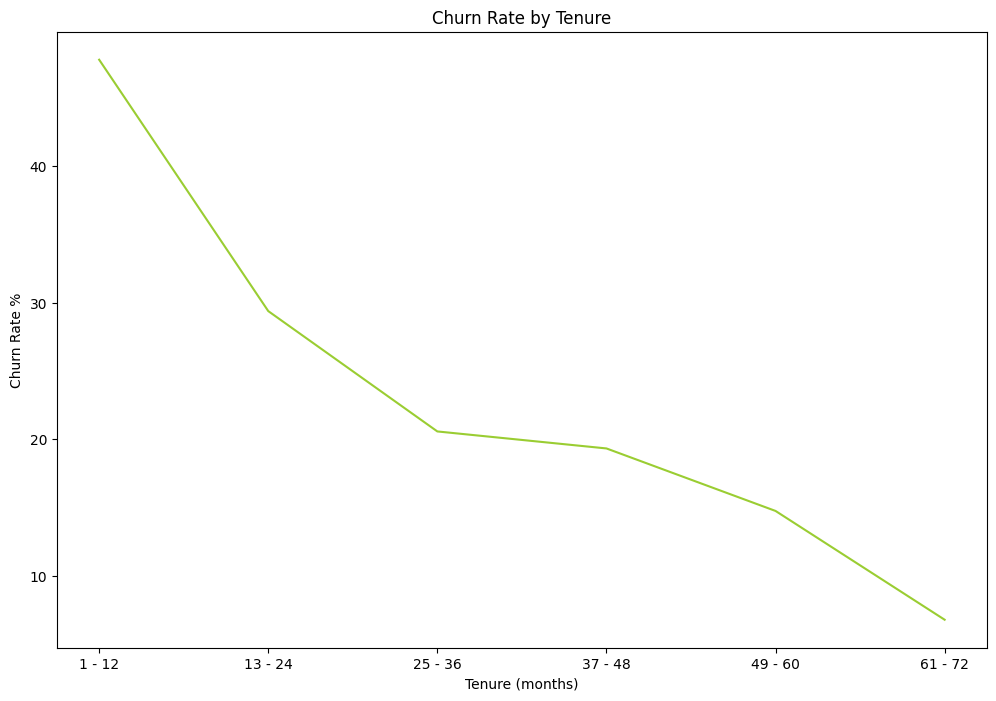

In [ ]:
# Plot the churn rate against tenure
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped, x='tenure_group', y='Churn Rate', color= 'yellowgreen')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate %')
plt.show()

The churn rate is calculated as the percentage of customers that have churned in each group. From the data, we can observe that the churn rate decreases as the tenure increases. For example, the churn rate for customers who stayed between 1 to 12 months is about 48%, while it's about 7% for customers who stayed between 61 to 72 months. This suggests that newer customers are more likely to churn compared to long-time customers.

6. What is the distribution of monthly charges for customers who churned versus those who did not churn?

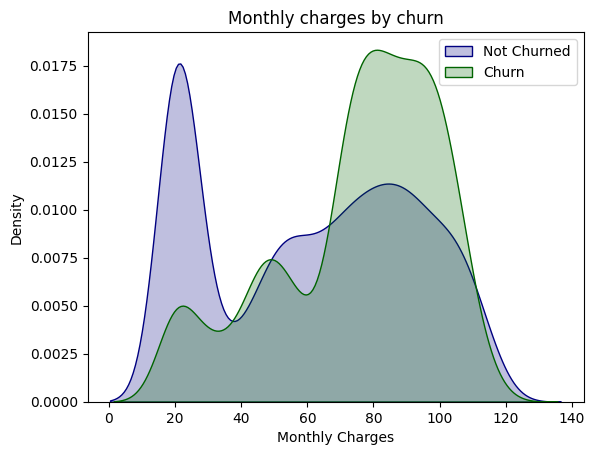

In [ ]:
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
monthly_charges = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == "Yes") ],
                ax =monthly_charges, color="darkgreen", fill = True)
monthly_charges.legend(["Not Churned","Churn"],loc='upper right')
monthly_charges.set_ylabel('Density')
monthly_charges.set_xlabel('Monthly Charges')
monthly_charges.set_title('Monthly charges by churn');

Churn is high when Monthly Charges are high

7. How does the distribution of total charges incurred by customers relate to churn rates?

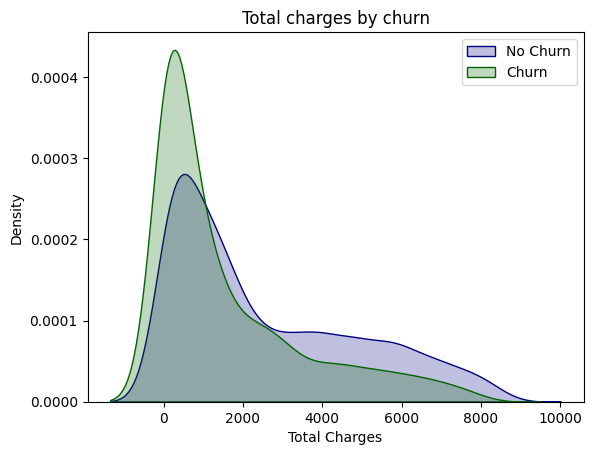

In [ ]:
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "No") ],
                color="navy", fill = True)
total_charges = sns.kdeplot(df.TotalCharges[(df["Churn"] == "Yes") ],
                ax =total_charges, color="darkgreen", fill= True)
total_charges.legend(["No Churn","Churn"],loc='upper right')
total_charges.set_ylabel('Density')
total_charges.set_xlabel('Total Charges')
total_charges.set_title('Total charges by churn');

Higher Churn at lower Total Charges. 

### **Multivariate Analysis** (analysis involving more than two variables):

8. Is there a correlation between MonthlyCharges, TotalCharges, and customer churn?

In [ ]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

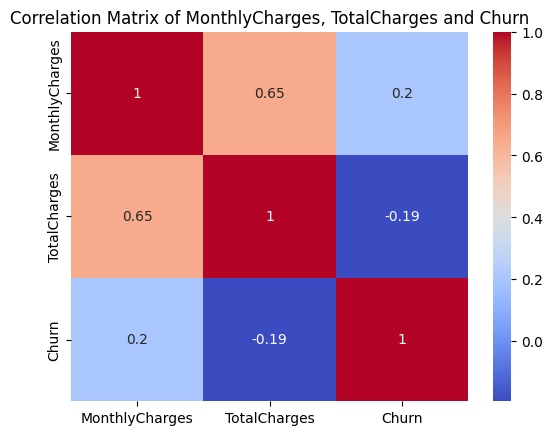

In [ ]:
# Select columns
columns = ['MonthlyCharges', 'TotalCharges', 'Churn']
# Calculate correlation matrix
corr_matrix = df[columns].corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of MonthlyCharges, TotalCharges and Churn')
plt.show()


9. How do the various combinations of factors like tenure, monthly charges, total charges, payment method, contract term, etc. affect churn?

Convert all the categorical variables into dummy variables

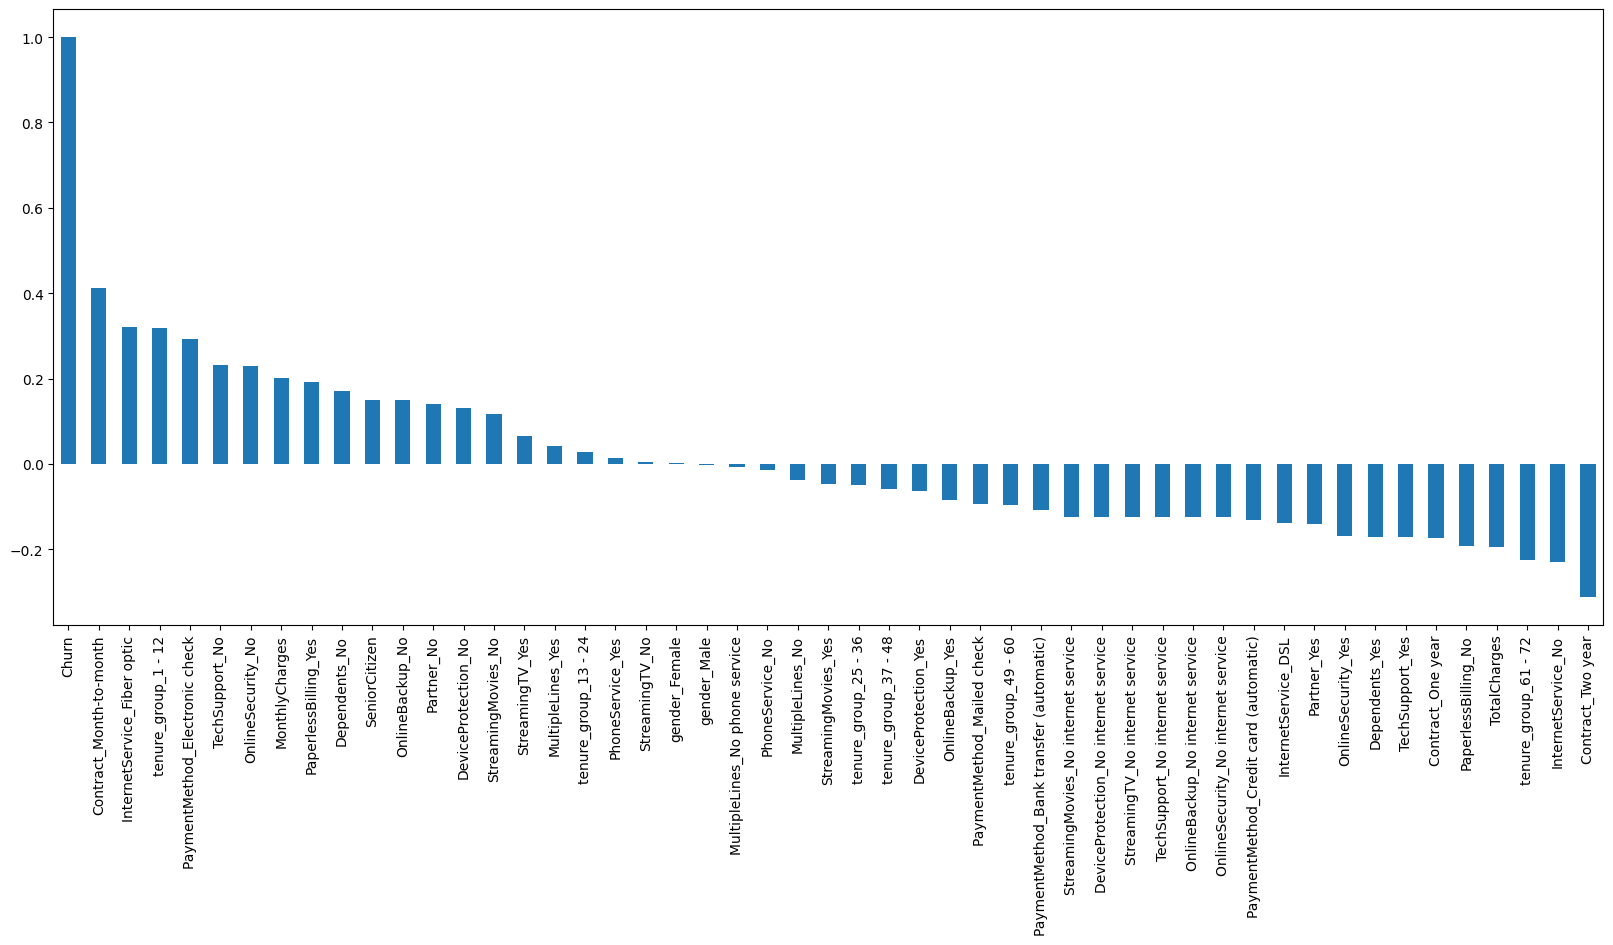

In [ ]:
df_dm = pd.get_dummies(df)
plt.figure(figsize=(20,8))
df_dm.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

<h3 style='background:#0A4D68; border:2; color:cyan; border-color:cyan; border-style:dotted;'><center>DATA PREPARATION FOR MODELING</center></h3> 

#### ONE HOT ENCODING OF THE CATEGORICAL COLUMNS USING THE ONEHOTENCODER 

In [ ]:
# Separating features and target variable
x = df.drop('Churn', axis=1)
y = df['Churn']

# below we are doing OneHotEncoding of the categoriacal variables 
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
# creating and instanciating of the onehot encoder 
encoder = OneHotEncoder(drop='first', sparse=False)  # 
x_encoded = encoder.fit_transform(x[categorical_cols])

# below we are dropping the original columns and concantenate the new columns 
x.drop(columns=categorical_cols, inplace=True)
x = pd.concat([x, pd.DataFrame(x_encoded)], axis=1)

SEPARATING THE DATA INTO X_TRAIN AND Y_TRAIN 

In [ ]:
# separate the data into x_train and y_train
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, random_state=42)

CALLING THE SMOTE TO BALANCE OUR DATA SET

In [ ]:
# due to some integers still in the x_train, we need to do some convertion 
# Convert feature names to strings
x_train.columns = x_train.columns.astype(str)

In [ ]:
# balancing the data set 
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train) ## Applying SMOTE to oversample the minority class
# Now X_train_resampled and y_train_resampled contain the balanced dataset


By performing Standardization, we ensure that the numerical features have a mean of 0 and a standard deviation of 1, which can help certain machine learning algorithms perform better and converge faster during training

In [ ]:
# creating a StandardScaler object
scaler = StandardScaler()

# below is defining the columns containing the numerical features to be scaled 
numerical_cols = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

# now let's fit and transform the numerical features in the  training data set 
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])

# now let's fit and transform the numerical features in the test data set
x_test[numerical_cols] = scaler.fit_transform(x_test[numerical_cols])



Performing Min-Max Scaling, we bring all the numerical features within the range [0, 1], which can be useful for algorithms that are sensitive to the scale of features, such as those based on distances or gradients.

In [ ]:


# Creating a MinMaxScaler object
scaler_mM = MinMaxScaler()

# Defining the columns containing the numerical features to be scaled 
numerical_cols = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

# now let's fit and transform the numerical features in the  training data set 
x_train[numerical_cols] = scaler_mM.fit_transform(x_train[numerical_cols])

# now let's fit and transform the numerical features in the test data set
x_test[numerical_cols] = scaler_mM.transform(x_test[numerical_cols])


<h3 style='background:#0A4D68; border:2; color:cyan; border-color:cyan; border-style:dotted;'><center>MODEL SELECTION AND TRAINING</center></h3>

In [ ]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

metrics = []

for model in models:
    model.fit(x_train_resampled, y_train_resampled)

    # Convert column names to strings here
    x.columns = x.columns.astype(str)
    x_test.columns = x_test.columns.astype(str)

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cv = cross_val_score(model, x, y, cv=10).mean()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    rc = recall_score(y_test, y_pred)

    metrics.append({"Model": model.__class__.__name__,
                    "Accuracy Score": acc,
                    "F1 Score": f1,
                    "ROC AUC Score": roc,
                    "R2 Score": r2,
                    "Cross Val Score": cv,
                    "RMSE": rmse,
                    "MAE": mae,
                    "MSE": mse,
                    "precision_score": pr,
                    "recall_score": rc})

overall = pd.DataFrame(metrics)
overall = overall.sort_values(by="Accuracy Score", ascending=False)
overall_styled = overall.style.background_gradient(cmap="Spectral")
overall_styled

,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,Cross Val Score,RMSE,MAE,MSE,precision_score,recall_score
3,RandomForestClassifier,0.788060,0.609174,0.733258,-0.078685,0.792637,0.460370,0.211940,0.211940,0.603636,0.614815
7,LogisticRegression,0.759204,0.324022,0.586999,-0.225548,0.805775,0.490710,0.240796,0.240796,0.659091,0.214815
5,GradientBoostingClassifier,0.750249,0.445916,0.631255,-0.271126,0.800398,0.499751,0.249751,0.249751,0.551913,0.374074
4,XGBClassifier,0.734328,0.280323,0.562963,-0.352154,0.780695,0.515433,0.265672,0.265672,0.514851,0.192593
2,DecisionTreeClassifier,0.715423,0.561350,0.703515,-0.448375,0.731345,0.533458,0.284577,0.284577,0.479058,0.677778
1,GaussianNB,0.699502,0.605744,0.750038,-0.529403,0.679802,0.548177,0.300498,0.300498,0.467742,0.859259
6,AdaBoostClassifier,0.535323,0.522983,0.665911,-1.365004,0.798806,0.681672,0.464677,0.464677,0.361072,0.948148
0,SVC,0.268657,0.423529,0.500000,-2.722222,0.735124,0.855186,0.731343,0.731343,0.268657,1.000000


### Confusion matrices for various models

In [ ]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Model: ", model.__class__.__name__)
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    fig = px.imshow(confusion_matrix(y_test, y_pred), color_continuous_scale='tropic',
                    title="Confusion Matrix of " + model.__class__.__name__,
                    labels=dict(x="Predicted", y="Actual", color="Counts"),
                    color_continuous_midpoint=0.8, width=400, height=400,
                    template="plotly_dark", text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  SVC
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       735
           1       0.00      0.00      0.00       270

    accuracy                           0.73      1005
   macro avg       0.37      0.50      0.42      1005
weighted avg       0.53      0.73      0.62      1005



----------------------------------------------------------
Model:  GaussianNB
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.60      0.73       735
           1       0.45      0.89      0.60       270

    accuracy                           0.68      1005
   macro avg       0.69      0.74      0.66      1005
weighted avg       0.80      0.68      0.70      1005



----------------------------------------------------------
Model:  DecisionTreeClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       735
           1       0.49      0.53      0.51       270

    accuracy                           0.72      1005
   macro avg       0.65      0.66      0.66      1005
weighted avg       0.73      0.72      0.73      1005



----------------------------------------------------------
Model:  RandomForestClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       735
           1       0.67      0.49      0.56       270

    accuracy                           0.80      1005
   macro avg       0.75      0.70      0.72      1005
weighted avg       0.79      0.80      0.79      1005



----------------------------------------------------------
Model:  XGBClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       735
           1       0.62      0.54      0.58       270

    accuracy                           0.79      1005
   macro avg       0.73      0.71      0.72      1005
weighted avg       0.78      0.79      0.78      1005



----------------------------------------------------------
Model:  GradientBoostingClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       735
           1       0.68      0.53      0.59       270

    accuracy                           0.81      1005
   macro avg       0.76      0.72      0.73      1005
weighted avg       0.80      0.81      0.80      1005



----------------------------------------------------------
Model:  AdaBoostClassifier
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       735
           1       0.66      0.57      0.61       270

    accuracy                           0.81      1005
   macro avg       0.76      0.73      0.74      1005
weighted avg       0.80      0.81      0.80      1005



----------------------------------------------------------
Model:  LogisticRegression
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       735
           1       0.71      0.55      0.62       270

    accuracy                           0.82      1005
   macro avg       0.78      0.73      0.75      1005
weighted avg       0.81      0.82      0.81      1005



----------------------------------------------------------


#### * After evaluating models with some metrics, I decided to eliminate some of them such as GaussianNB, AdaBoost Classifier and SVC. Because they have lower accuracy scores than others.

<h1 style='background:#0A4D68; border:4; color:cyan; border-color:cyan; border-style:dotted;'><center> Feature Engineering</center></h1> 

In [ ]:
# Perform one-hot encoding on categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

features = df_encoded.drop('Churn', axis=1).columns.values
models = [RandomForestClassifier(), XGBClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

for model in models:
    print("Model: ", model.__class__.__name__)
    model.fit(df_encoded[features], df_encoded['Churn'])  # Fit the model with your data
    tmp = pd.DataFrame({'Feature': features, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance', ascending=False)
    fig = px.bar(tmp, x='Feature', y='Feature importance', color='Feature importance', title="Features importance of " + type(model).__name__,
                 labels=dict(x="Feature", y="Feature importance", color="Feature importance"), color_continuous_midpoint=0.8,
                 width=600, height=600, template="plotly_dark", color_continuous_scale='tropic')

    fig.show()
    
    ### KNN and Logistic regression models are not suitable for feature importance

Model:  RandomForestClassifier


Model:  XGBClassifier


Model:  GradientBoostingClassifier


Model:  DecisionTreeClassifier


<h1 style='background:#0A4D68; border:3; color:cyan; border-color:cyan; border-style:dotted;'><center> AUC-ROC</center></h1> 

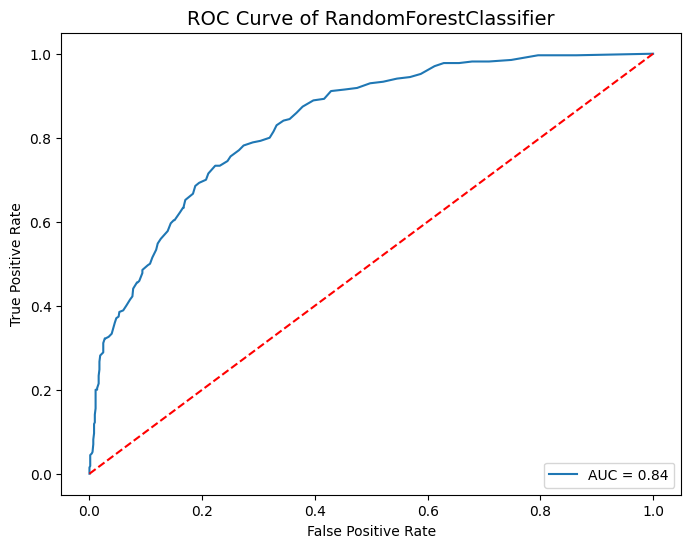

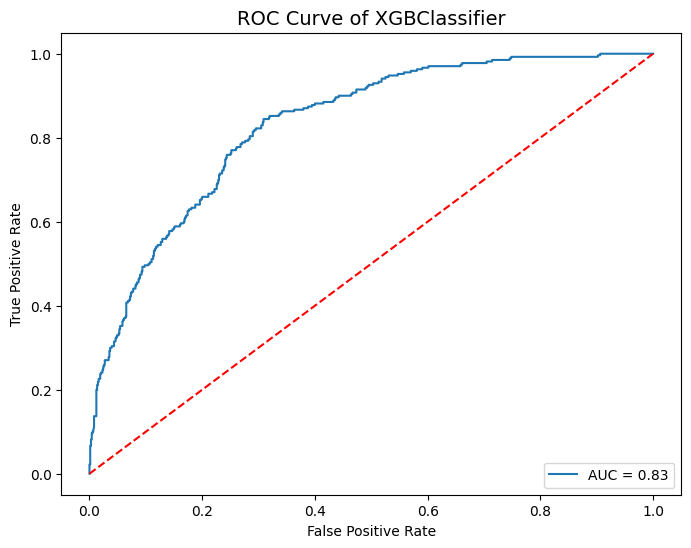

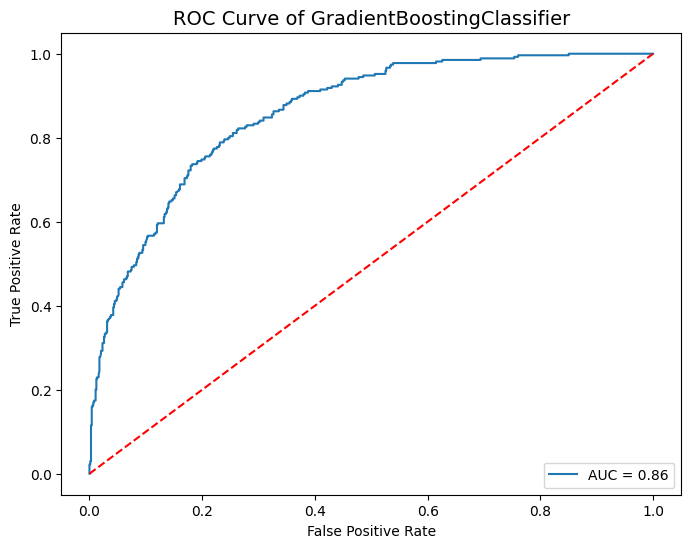

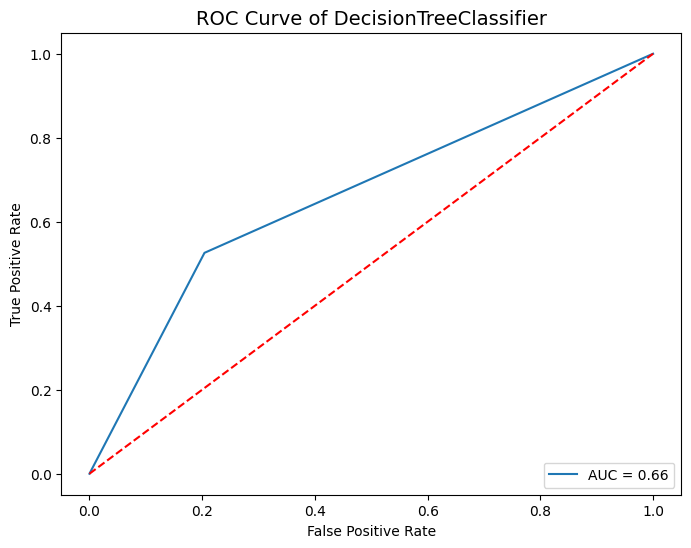

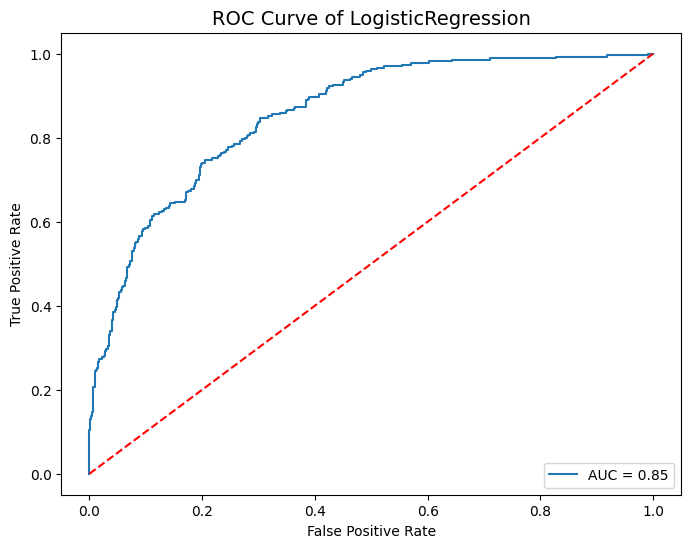

In [ ]:
models =[RandomForestClassifier(), XGBClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in models:
    # Fit the model on your training data before making predictions
    model.fit(x_train, y_train)
    
    # ROC Curve:
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(y_test, y_prob))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend(loc='lower right')
    plt.title("ROC Curve of " + model.__class__.__name__, size=14)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

### After Auc-roc curve, I decided to eliminate DecisionTreeClassifier and XGBClassiffier. Because they have the lowest auc-roc score.

<h1 style='background:#0A4D68; border:3; color:cyan; border-color:cyan; border-style:dotted;'><center> MODEL TUNING</center></h1> 

In [ ]:

# Define models
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
lr = LogisticRegression()

# Define hyperparameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gbc_params = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [2, 3, 8],
    'n_estimators': [100, 200, 500]
}

lr_params = {
    'C': [0.1, 1, 5, 10, 50, 100]
}

# Create lists of models and their corresponding parameter grids
models = [rf, gbc, lr]
params = [rf_params, gbc_params, lr_params]

# Perform grid search for each model
for model, param_grid in zip(models, params):
    grid_cv = GridSearchCV(model, param_grid, cv=10, n_jobs=-1, verbose=2)
    grid_cv.fit(x_train, y_train)
    
    print(model.__class__.__name__, "Best params:", grid_cv.best_params_)


Fitting 10 folds for each of 81 candidates, totalling 810 fits
RandomForestClassifier Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Fitting 10 folds for each of 27 candidates, totalling 270 fits
GradientBoostingClassifier Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Fitting 10 folds for each of 6 candidates, totalling 60 fits
LogisticRegression Best params: {'C': 0.1}


In [ ]:
# Final models:


rfc=RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.05,max_depth=3,n_estimators=200,random_state=42)
lr=LogisticRegression(C=0.1,random_state=42)

models = [rfc,gbc,lr]

overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                              "Cross Val Score","RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    cv=cross_val_score(model,x,y,cv=10).mean()
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "Cross Val Score":cv,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="Spectral")
overral

,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,Cross Val Score,RMSE,MAE,MSE,precision_score,recall_score
2,LogisticRegression,0.813930,0.601279,0.721655,0.052986,0.804186,0.431358,0.186070,0.186070,0.708543,0.522222
1,GradientBoostingClassifier,0.806965,0.588983,0.714550,0.017536,0.801593,0.439357,0.193035,0.193035,0.688119,0.514815
0,RandomForestClassifier,0.800000,0.567742,0.701587,-0.017914,0.801196,0.447214,0.200000,0.200000,0.676923,0.488889


In [ ]:
models = [ rfc,gbc,lr]
for model in models:
    
    print("Model: ",model.__class__.__name__)
    fig=px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale='tropic',title="Confusion Matrix of "+model.__class__.__name__,
              labels=dict(x="Predicted",y="Actual",color="Counts"),color_continuous_midpoint=0.8,
              width=400,height=400,template="plotly_dark",text_auto=True)
    fig.show()
    print("----------------------------------------------------------")

Model:  RandomForestClassifier


----------------------------------------------------------
Model:  GradientBoostingClassifier


----------------------------------------------------------
Model:  LogisticRegression


----------------------------------------------------------


VISUALIZING PREDICTED RESULTS

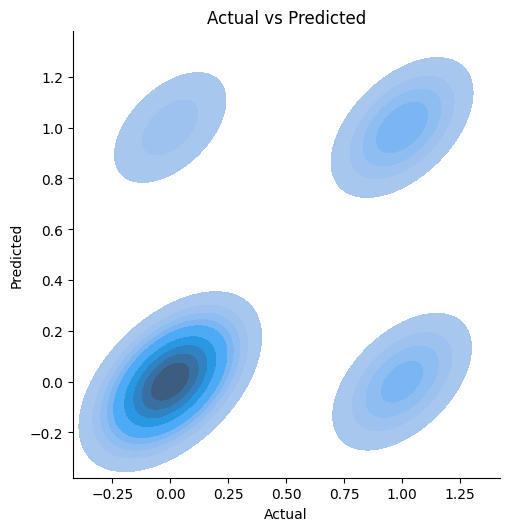

In [ ]:
#visualizing prediction results:

lr = LogisticRegression(C=100, penalty='l2', solver='liblinear', random_state=42)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred = y_pred.reshape(-1, 1)

# Convert y_test Series to a NumPy array
y_test_array = np.array(y_test).reshape(-1, 1)

sns.displot(x=y_test_array.flatten(), y=y_pred.flatten(), kind="kde", fill=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

* Through meticulous data preprocessing, feature engineering, and model training, we successfully constructed a logistic regression classification model that achieved an impressive accuracy score of 0.809. This score indicates that our model is adept at distinguishing between loyal customers and those at risk of churning.

### Using pickle to export all of our key model components in a python dictionary and save it as a file.

In [ ]:
components={
'imputer': imputer,
'encoder' : encoder,
'smote' : smote,
'scaler': scaler,
'scaler_mM' : scaler_mM,
'models' : models
}

In [ ]:
import os
import pickle




In [ ]:
os.mkdir("Export1")

In [ ]:
destination =os.path.join(".","Export1")

In [ ]:
with open(os.path.join(destination,"ml.pkl"),"wb") as f:
    pickle.dump(components, f)

In [ ]:
!pip freeze > Export1/requirements.txt

In [ ]:
!zip -r Export1.zip Export1/

'zip' is not recognized as an internal or external command,
operable program or batch file.
